# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [19]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
df = pd.merge(study_results, mouse_metadata, on="Mouse ID")

# Display the data table for preview
df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [9]:
#view each table separately
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [10]:
#view each table separately
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [22]:
# Checking the number of mice.
df["Mouse ID"].nunique()

249

In [25]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
df.groupby(["Mouse ID", "Timepoint"]).count()

Tumor Volume (mm3)  Metastatic Sites  Drug Regimen  Sex  \
Mouse ID Timepoint                                                            
a203     0                           1                 1             1    1   
         5                           1                 1             1    1   
         10                          1                 1             1    1   
         15                          1                 1             1    1   
         20                          1                 1             1    1   
...                                ...               ...           ...  ...   
z969     25                          1                 1             1    1   
         30                          1                 1             1    1   
         35                          1                 1             1    1   
         40                          1                 1             1    1   
         45                          1                 1             1    1   

                    Age_months  Weight (g)  
Mouse ID Timepoint                          
a203     0                   1           1  
         5                   1           1  
         10                  1           1  
         15                  1           1  
         20                  1           1  
...                        ...         ...  
z969     25                  1           1  
         30                  1           1  
         35                  1           1  
         40                  1           1  
         45                  1           1  

[1888 rows x 6 columns]

In [29]:
df.groupby(["Mouse ID", "Timepoint"]).size().sort_values(ascending=False)

Mouse ID  Timepoint
g989      20           2
          15           2
          10           2
          5            2
          0            2
                      ..
i334      20           1
          15           1
          10           1
          5            1
z969      45           1
Length: 1888, dtype: int64

In [36]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mask = df["Mouse ID"] != "g989"
df2 = df.loc[mask].reset_index(drop=True)
df2.count

<bound method DataFrame.count of      Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
0        b128          0           45.000000                 0    Capomulin   
1        f932          0           45.000000                 0     Ketapril   
2        g107          0           45.000000                 0     Ketapril   
3        a457          0           45.000000                 0     Ketapril   
4        c819          0           45.000000                 0     Ketapril   
...       ...        ...                 ...               ...          ...   
1875     r944         45           41.581521                 2    Capomulin   
1876     u364         45           31.023923                 3    Capomulin   
1877     p438         45           61.433892                 1     Ceftamin   
1878     x773         45           58.634971                 4      Placebo   
1879     b879         45           72.555239                 2     Stelasyn   

         Sex  Age_

In [37]:
# Checking the number of mice in the clean DataFrame.
df2["Mouse ID"].nunique()

248

## Summary Statistics

In [49]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

tumor_mean = df2.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].mean()
tumor_median = df2.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].median()
tumor_sem = df2.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].sem()
tumor_var = df2.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].var()
tumor_stdev = df2.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].std()
data = {
    "Tumor Mean": tumor_mean,
    "Tumor Median": tumor_median,
    "Tumor SEM": tumor_sem,
    "Tumor Variance": tumor_var,
    "Tumor Standard Deviation": tumor_stdev
}

leaderboard = pd.DataFrame(data).reset_index()
leaderboard

,Drug Regimen,Tumor Mean,Tumor Median,Tumor SEM,Tumor Variance,Tumor Standard Deviation
0,Capomulin,40.675741,41.557809,0.329346,24.947764,4.994774
1,Ceftamin,52.591172,51.776157,0.469821,39.290177,6.268188
2,Infubinol,52.884795,51.820584,0.492236,43.128684,6.567243
3,Ketapril,55.235638,53.698743,0.603860,68.553577,8.279709
4,Naftisol,54.331565,52.509285,0.596466,66.173479,8.134708
5,Placebo,54.033581,52.288934,0.581331,61.168083,7.821003
6,Propriva,52.320930,50.446266,0.544332,43.852013,6.622085
7,Ramicane,40.216745,40.673236,0.320955,23.486704,4.846308
8,Stelasyn,54.233149,52.431737,0.573111,59.450562,7.710419
9,Zoniferol,53.236507,51.818479,0.516398,48.533355,6.966589


In [51]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
aggregated_data = df2.groupby('Drug Regimen').agg({'Tumor Volume (mm3)': ['sum', 'mean','sem', 'var', 'std']})
print(aggregated_data)

             Tumor Volume (mm3)                                          
                            sum       mean       sem        var       std
Drug Regimen                                                             
Capomulin           9355.420462  40.675741  0.329346  24.947764  4.994774
Ceftamin            9361.228582  52.591172  0.469821  39.290177  6.268188
Infubinol           9413.493529  52.884795  0.492236  43.128684  6.567243
Ketapril           10384.299876  55.235638  0.603860  68.553577  8.279709
Naftisol           10105.671026  54.331565  0.596466  66.173479  8.134708
Placebo             9780.078122  54.033581  0.581331  61.168083  7.821003
Propriva            7743.497619  52.320930  0.544332  43.852013  6.622085
Ramicane            9169.417875  40.216745  0.320955  23.486704  4.846308
Stelasyn            9816.199991  54.233149  0.573111  59.450562  7.710419
Zoniferol           9689.044192  53.236507  0.516398  48.533355  6.966589


## Bar and Pie Charts

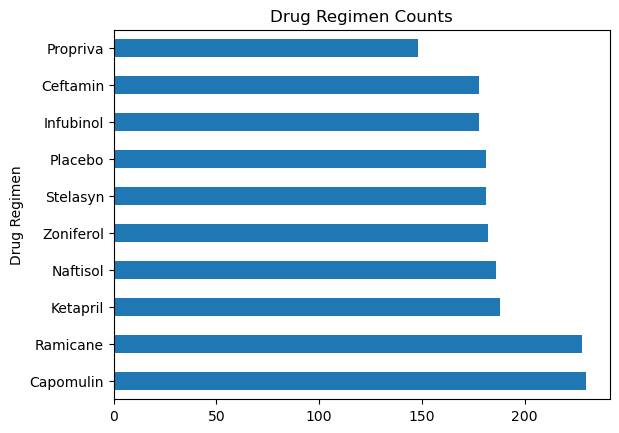

In [52]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
df2["Drug Regimen"].value_counts().plot(kind="barh", title="Drug Regimen Counts")
plt.show()

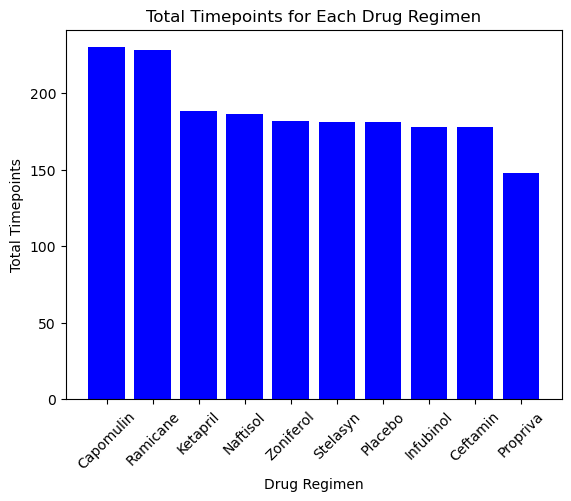

In [70]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
data = df2["Drug Regimen"].value_counts()
x = list(data.index)
y = list(data.values)

plt.bar(x, y, color='b')
plt.xlabel('Drug Regimen')
plt.ylabel('Total Timepoints')
plt.title('Total Timepoints for Each Drug Regimen')
plt.xticks(rotation=45)
plt.show()

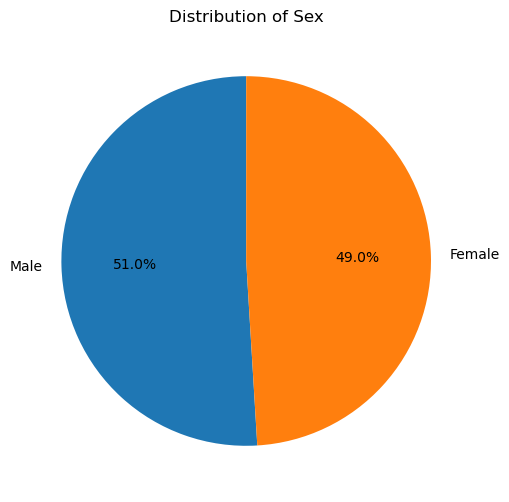

In [78]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
data = df2["Sex"].value_counts()
data.plot(kind='pie', autopct='%1.1f%%', startangle=90, figsize=(6, 6))
plt.title('Distribution of Sex')
plt.ylabel('')
plt.show()

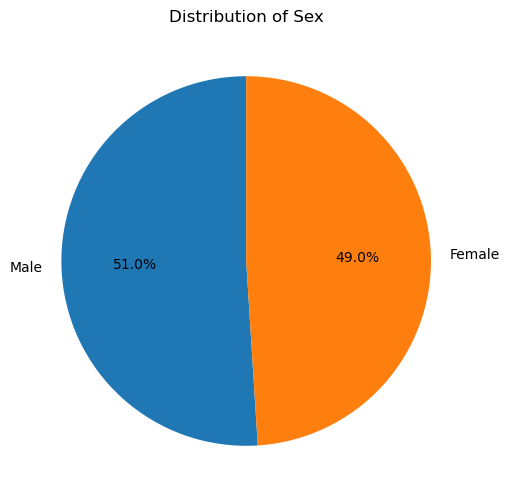

In [79]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ['Male', 'Female']
sizes = [51, 49]
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Sex')
plt.show()

## Quartiles, Outliers and Boxplots

In [86]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_tumor = df2.groupby(["Mouse ID"])["Timepoint"].max()
max_tumor = max_tumor.reset_index()
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_data = max_tumor.merge(df2, on=['Mouse ID','Timepoint'], how='left')
merged_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [95]:
# Put treatments into a list for for loop (and later for plot labels)
drug_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in drug_list:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_tumor_vol = merged_data.loc[merged_data["Drug Regimen"] == drug, "Tumor Volume (mm3)"]
    
    # add subset 
    tumor_vol_list.append(final_tumor_vol)
    
    # Determine outliers using upper and lower bounds
    quartiles = final_tumor_vol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = final_tumor_vol.loc[(final_tumor_vol < lower_bound) | (final_tumor_vol > upper_bound)]
    print(f'({drug} potential outliers: {outliers})')

(Capomulin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64))
(Ramicane potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64))
(Infubinol potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64)
(Ceftamin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64))


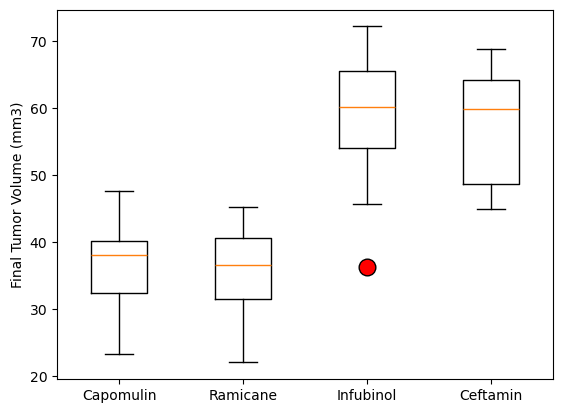

In [96]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
red_out = dict(markerfacecolor='red',markersize=12)
plt.boxplot(tumor_vol_list, labels = drug_list, flierprops=red_out)
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

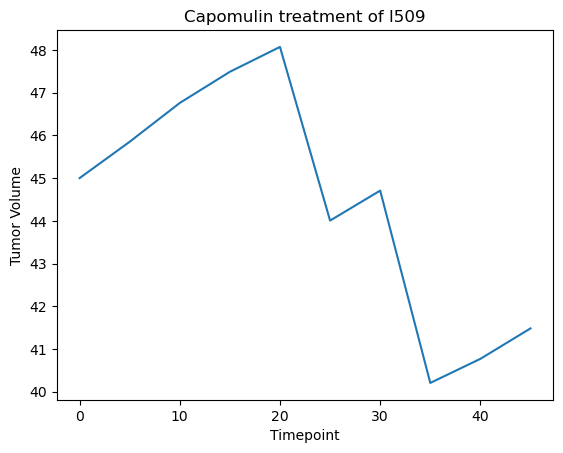

In [97]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_table = df2.loc[df2["Drug Regimen"] == "Capomulin"]
mouse_data = capomulin_table.loc[capomulin_table["Mouse ID"] == 'l509']

plt.plot(mouse_data['Timepoint'], mouse_data['Tumor Volume (mm3)'])
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume')
plt.title('Capomulin treatment of l509')
plt.show()

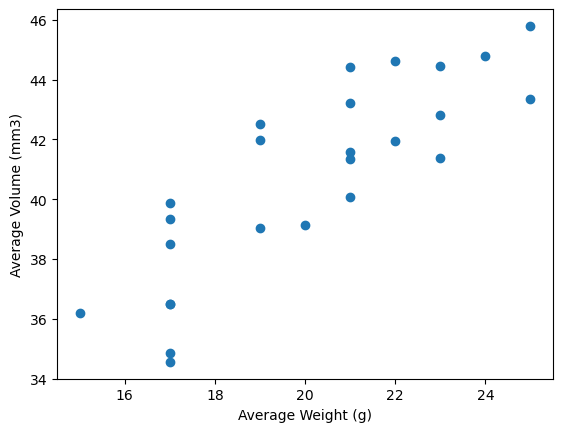

In [98]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_table = df2.loc[df2["Drug Regimen"] == "Capomulin"]
capomulin_average = capomulin_table.groupby(['Mouse ID'])[['Weight (g)', 'Tumor Volume (mm3)']].mean()
plt.scatter(capomulin_average['Weight (g)'], capomulin_average['Tumor Volume (mm3)'])
plt.xlabel('Average Weight (g)')
plt.ylabel('Average Volume (mm3)')
plt.show()

## Correlation and Regression

In [105]:
# Calculate the correlation coefficient and a linear regression model 
correlation_coefficient = df['x'].corr(df['y'])
# for mouse weight and average observed tumor volume for the entire Capomulin regimen


KeyError: 'x'